In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Load your dataset
df = pd.read_csv('MTA_NYCT_Customer_Engagement_Statistics__2017-2022.csv')

# Prepare X and y
X = df[['Avg Time to Answer (s)']].values
y = df['Calls Answered Rate'].values  # Ensure it's in 0-1 format

# If Calls Answered Rate is in percentage (e.g. 78), convert to 0-1
if y.max() > 1:
    y = y / 100


In [18]:
# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Output coefficients
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])


Intercept: 0.9783856660959255
Slope: -0.0005921568732388666


In [19]:
# Predict current rate at 221s
current_wait = 221
current_rate = model.predict(np.array([[current_wait]]))[0]
print(f"Predicted Calls Answered Rate at {current_wait}s wait time: {current_rate*100:.2f}%")

# Predict projected rate at 200s
projected_wait = 150
projected_rate = model.predict(np.array([[projected_wait]]))[0]
print(f"Predicted Calls Answered Rate at {projected_wait}s wait time: {projected_rate*100:.2f}%")


Predicted Calls Answered Rate at 221s wait time: 84.75%
Predicted Calls Answered Rate at 150s wait time: 88.96%


In [20]:
# Calculate average total incoming calls per month
avg_total_calls = df['Total Incoming Calls'].mean()

# Calculate calls answered
current_calls_answered = avg_total_calls * current_rate
projected_calls_answered = avg_total_calls * projected_rate

# Additional calls answered
additional_calls = projected_calls_answered - current_calls_answered

print(f"Average Total Incoming Calls per Month: {avg_total_calls:,.0f}")
print(f"Current Calls Answered per Month: {current_calls_answered:,.0f}")
print(f"Projected Calls Answered per Month: {projected_calls_answered:,.0f}")
print(f"Additional Calls Answered per Month if wait time reduced to {projected_wait}s: {additional_calls:,.0f}")


Average Total Incoming Calls per Month: 68,181
Current Calls Answered per Month: 57,784
Projected Calls Answered per Month: 60,651
Additional Calls Answered per Month if wait time reduced to 150s: 2,867


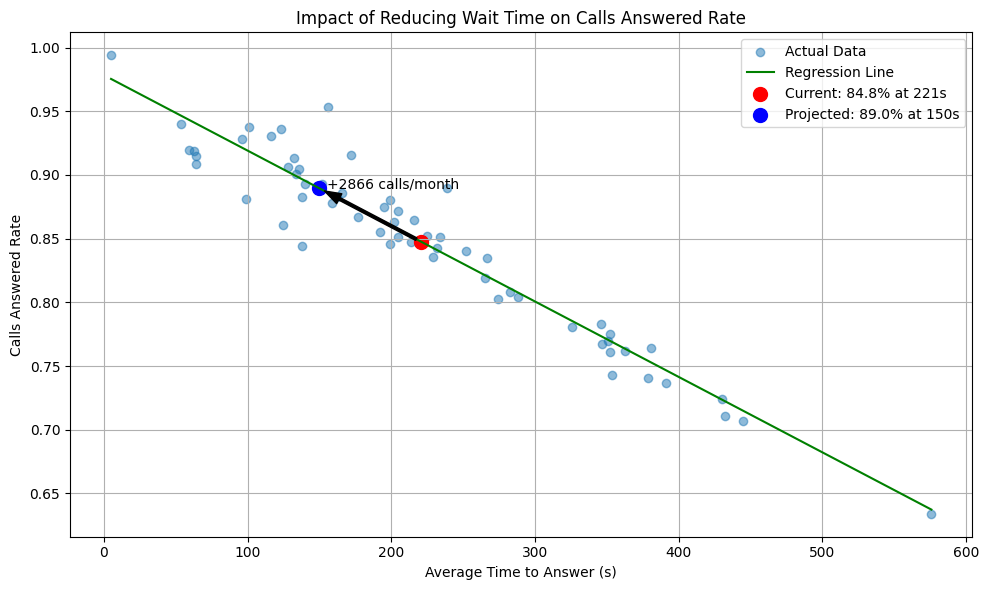

In [21]:
import matplotlib.pyplot as plt

# Plotting the regression and transition
plt.figure(figsize=(10,6))

# Scatter plot of data
plt.scatter(X, y, alpha=0.5, label='Actual Data')

# Regression line
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_pred = model.predict(x_range)
plt.plot(x_range, y_pred, color='green', label='Regression Line')

# Highlight current and projected points
plt.scatter(current_wait, current_rate, color='red', s=100, label=f'Current: {current_rate*100:.1f}% at {current_wait}s')
plt.scatter(projected_wait, projected_rate, color='blue', s=100, label=f'Projected: {projected_rate*100:.1f}% at {projected_wait}s')

# Arrow to show transition
plt.annotate('', xy=(projected_wait, projected_rate), xytext=(current_wait, current_rate),
             arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=8))

# Add additional calls annotation
plt.text(projected_wait + 5, projected_rate, f'+{int(additional_calls)} calls/month', fontsize=10, color='black')

# Labels and title
plt.xlabel('Average Time to Answer (s)')
plt.ylabel('Calls Answered Rate')
plt.title('Impact of Reducing Wait Time on Calls Answered Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()
